In [ ]:
# Decision treee building

In [4]:
# Surpress warnings:
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn

In [5]:
#import necessary libraries

import sys
import numpy as np 
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
import sklearn.tree as tree

In [6]:
#Read-in the data
my_data = pd.read_csv('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%203/data/drug200.csv', delimiter=",")
my_data.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,drugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,drugY


In [7]:
#Remove the column containing the target name since it doesn't contain numeric values.

X = my_data[['Age', 'Sex', 'BP', 'Cholesterol', 'Na_to_K']].values
X[0:5]


array([[23, 'F', 'HIGH', 'HIGH', 25.355],
       [47, 'M', 'LOW', 'HIGH', 13.093],
       [47, 'M', 'LOW', 'HIGH', 10.114],
       [28, 'F', 'NORMAL', 'HIGH', 7.798],
       [61, 'F', 'LOW', 'HIGH', 18.043]], dtype=object)

In [8]:
#convert these features to numerical values using pandas.get_dummies() 
#to convert the categorical variable into dummy/indicator variables.

from sklearn import preprocessing
le_sex = preprocessing.LabelEncoder()
le_sex.fit(['F','M'])
X[:,1] = le_sex.transform(X[:,1]) 


le_BP = preprocessing.LabelEncoder()
le_BP.fit([ 'LOW', 'NORMAL', 'HIGH'])
X[:,2] = le_BP.transform(X[:,2])


le_Chol = preprocessing.LabelEncoder()
le_Chol.fit([ 'NORMAL', 'HIGH'])
X[:,3] = le_Chol.transform(X[:,3]) 

X[0:5]


array([[23, 0, 0, 0, 25.355],
       [47, 1, 1, 0, 13.093],
       [47, 1, 1, 0, 10.114],
       [28, 0, 2, 0, 7.798],
       [61, 0, 1, 0, 18.043]], dtype=object)

In [9]:
# Now we can fill the target variable.
y = my_data["Drug"]
y[0:5]

0    drugY
1    drugC
2    drugC
3    drugX
4    drugY
Name: Drug, dtype: object

In [10]:
#Set up the decision tree

from sklearn.model_selection import train_test_split

# train_test_split will return 4 different parameters. We will name them: X_trainset, X_testset, y_trainset, y_testset 
# The train_test_split will need the parameters: X, y, test_size=0.3, and random_state=3
#random_state controls the shuffling applied to the data before applying the split

X_trainset, X_testset, y_trainset, y_testset = train_test_split(X, y, test_size=0.3, random_state=3)
#check tha the sizes are correct 
print(X_trainset.shape)
print(y_trainset.shape)
print(X_testset.shape) #30% of the data is in the test cohort
print(y_testset.shape) #30% of the data is in the test cohort

(140, 5)
(140,)
(60, 5)
(60,)


In [12]:
#Modelling of the decission tree
#create an instance of the DecisionTreeClassifier called drugTree.
#Inside of the classifier, specify criterion="entropy" so we can see the information gain of each node.

drugTree = DecisionTreeClassifier(criterion="entropy", max_depth = 4)
drugTree # it shows the default parameters

DecisionTreeClassifier(criterion='entropy', max_depth=4)

In [13]:
#fit the data with the training feature matrix X_trainset and training response vector y_trainset

drugTree.fit(X_trainset,y_trainset)

DecisionTreeClassifier(criterion='entropy', max_depth=4)

In [15]:
#make some predictions on the testing dataset and store it into a variable called predTree.
predTree = drugTree.predict(X_testset)

print (predTree [0:5])
print (y_testset [0:5])

['drugY' 'drugX' 'drugX' 'drugX' 'drugX']
40     drugY
51     drugX
139    drugX
197    drugX
170    drugX
Name: Drug, dtype: object


In [17]:
#Data Evaluation

from sklearn import metrics
import matplotlib.pyplot as plt
print("DecisionTrees's Accuracy: ", metrics.accuracy_score(y_testset, predTree))

#Accuracy classification score computes subset accuracy: the set of labels
#predicted for a sample must exactly match the corresponding set of labels in y_true.

DecisionTrees's Accuracy:  0.9833333333333333


In [18]:
# Notice: You might need to uncomment and install the pydotplus and graphviz libraries if you have not installed these before
!conda install -c conda-forge pydotplus -y
!conda install -c conda-forge python-graphviz -y

DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): conda.anaconda.org:443
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): repo.anaconda.com:443
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): repo.anaconda.com:443
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): repo.anaconda.com:443
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): repo.anaconda.com:443
\ DEBUG:urllib3.connectionpool:https://repo.anaconda.com:443 "GET /pkgs/r/noarch/current_repodata.json HTTP/1.1" 200 None
DEBUG:urllib3.connectionpool:https://repo.anaconda.com:443 "GET /pkgs/r/osx-arm64/current_repodata.json HTTP/1.1" 304 0
DEBUG:urllib3.connectionpool:https://conda.anaconda.org:443 "GET /conda-forge/osx-arm64/current_repodata.json HTTP/1.1" 200 None
DEBUG:urllib3.connectionpool:https://conda.anaconda.org:443 "GET /conda-forge/noarch/current_repodata.json HTTP/1.1" 200 None
\ DEBUG:urllib3.connectionpool:https://repo.anaconda.com:443 "GET /pkgs/

DEBUG:urllib3.connectionpool:https://conda.anaconda.org:443 "GET /conda-forge/noarch/font-ttf-ubuntu-0.83-h77eed37_1.conda HTTP/1.1" 200 1619820


font-ttf-ubuntu-0.83 | 1.5 MB    | #1                                    |   3% DEBUG:urllib3.connectionpool:https://conda.anaconda.org:443 "GET /conda-forge/osx-arm64/libexpat-2.5.0-hb7217d7_1.conda HTTP/1.1" 200 63442
DEBUG:urllib3.connectionpool:https://conda.anaconda.org:443 "GET /conda-forge/noarch/fonts-conda-ecosystem-1-0.tar.bz2 HTTP/1.1" 200 3667
libexpat-2.5.0       | 62 KB     | #########5                            |  26% 



fonts-conda-ecosyste | 4 KB      | ##################################### | 100% 



fonts-conda-ecosyste | 4 KB      | ##################################### | 100% DEBUG:urllib3.connectionpool:https://conda.anaconda.org:443 "GET /conda-forge/osx-arm64/ca-certificates-2023.11.17-hf0a4a13_0.conda HTTP/1.1" 200 154444

ca-certificates-2023 | 151 KB    | ###9                                  |  11% DEBUG:urllib3

DEBUG:urllib3.connectionpool:https://conda.anaconda.org:443 "GET /conda-forge/noarch/python-graphviz-0.20.1-pyh22cad53_0.tar.bz2 HTTP/1.1" 200 36344
                                                                                
Preparing transaction: done
Verifying transaction: done
Executing transaction: done


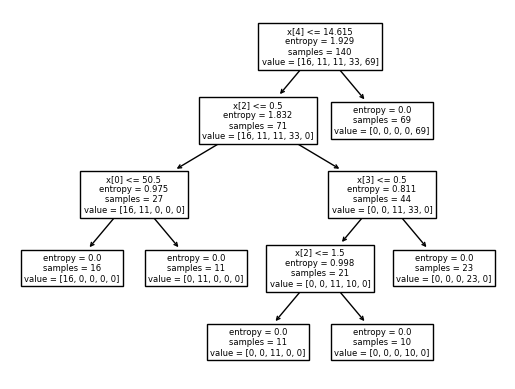

In [19]:
tree.plot_tree(drugTree)
plt.show()